## TCIA

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade -q tcia_utils
!{sys.executable} -m pip install --upgrade -q git+https://github.com/kirbyju/pydicom-seg.git@master
!{sys.executable} -m pip install --upgrade -q simpleDicomViewer

In [ ]:
import requests
import pandas as pd
from tcia_utils import nbia
from simpleDicomViewer import dicomViewer

In [ ]:
# Afficher les collections de TCIA : 
# nbia.getCollections()

In [ ]:
data = nbia.getSeries(collection = "HCC-TACE-Seg")
nbia.downloadSeries(data, number=10)
# nbia.downloadSeries(data) # pour télécharger tout le dataset

2025-04-02 15:14:58,856:INFO:Success - Token saved to global api_call_headers variable and expires at 2025-04-02 17:14:58.856633
2025-04-02 15:14:58,858:INFO:Accessing public data anonymously. To access restricted data use nbia.getToken() with your credentials.
2025-04-02 15:14:58,860:INFO:Calling getSeries with parameters {'Collection': 'HCC-TACE-Seg'}


[{'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1706.8374.288936153358575768332977262270', 'StudyInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1706.8374.191238202133507320458118565112', 'Modality': 'CT', 'SeriesDescription': 'Recon 2: PRE LIVER', 'BodyPartExamined': 'LIVER', 'SeriesNumber': 3, 'Collection': 'HCC-TACE-Seg', 'PatientID': 'HCC_048', 'ImageCount': 87, 'TimeStamp': '2021-04-01 12:03:51.0', 'LicenseName': 'Creative Commons Attribution 4.0 International License', 'LicenseURI': 'https://creativecommons.org/licenses/by/4.0/', 'CollectionURI': 'https://doi.org/10.7937/TCIA.5FNA-0924', 'FileSize': 45840056, 'DateReleased': '2022-08-17 00:00:00.0', 'StudyDesc': 'CT C/A/P LIVER PR', 'StudyDate': '2001-08-12 00:00:00.0', 'ThirdPartyAnalysis': 'NO'}, {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1706.8374.281650679207816520863173918688', 'StudyInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1706.8374.128750515241701445125322964595', 'Modality': 'CT', 'SeriesDescription': 'Recon 2: LIVER 3 PHASE (AP

In [ ]:
dicomViewer.viewSeries("tciaDownload/1.3.6.1.4.1.14519.5.2.1.1706.8374.288936153358575768332977262270")

interactive(children=(IntSlider(value=43, description='x', max=86), Output()), _dom_classes=('widget-interact'…

## Dataset de http://medicaldecathlon.com/

In [35]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from IPython.display import display

def update_slice(idx, ax, fig):
    ax.clear()
    ax.imshow(data[:, :, idx], cmap="gray")
    ax.set_title(f"Slice {idx} de liver_0.nii.gz")
    ax.axis("off")
    fig.canvas.draw()


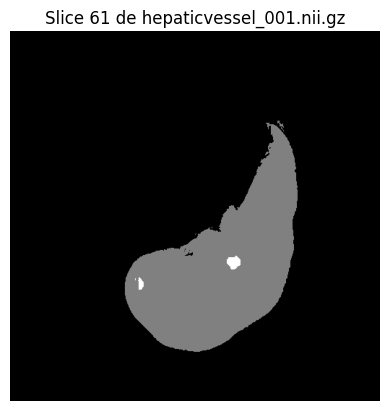

In [38]:
# image_path = "Task08_HepaticVessel/labelsTr/hepaticvessel_002.nii.gz"
image_path = "Task03_Liver/labelsTr/liver_1.nii.gz"
img = nib.load(image_path)

data = img.get_fdata()

# Afficher une coupe axiale (au milieu du volume)

slice_idx = data.shape[2] // 2  # Prendre la coupe du milieu
plt.imshow(data[:, :, slice_idx], cmap="gray")
plt.axis("off")
plt.title(f"Slice {slice_idx} de hepaticvessel_001.nii.gz")
plt.show()

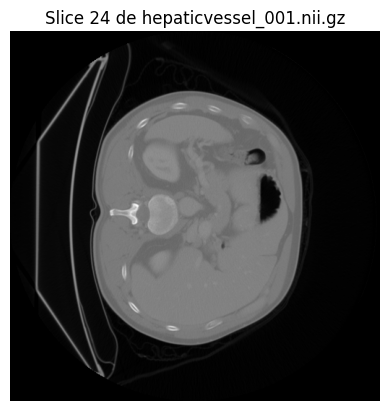

In [39]:
image_path = "Task08_HepaticVessel/imagesTr/hepaticvessel_001.nii.gz"
img = nib.load(image_path)

data = img.get_fdata()

# Afficher une coupe axiale (au milieu du volume)
slice_idx = data.shape[2] // 2  # Prendre la coupe du milieu
plt.imshow(data[:, :, slice_idx], cmap="gray")
plt.axis("off")
plt.title(f"Slice {slice_idx} de hepaticvessel_001.nii.gz")
plt.show()

## Kaggle

In [40]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ethelzq/multidimensional-choledoch-database",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\cyrie\AppData\Local\Temp\ipykernel_24112\3920748221.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


ValueError: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt